Data wrangling refers to combining, transforming, and re-arranging data to make it suitable for further analysis. We'll use Pandas for all data wrangling operations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Hierarchical indexing

Until now we have seen only a single level of indexing in the rows and columns of a Pandas DataFrame. Hierarchical indexing refers to having multiple index levels on an axis (row / column) of a Pandas DataFrame. It helps us to work with a higher dimensional data in a lower dimensional form. 

### Hierarchical indexing in Pandas Series

Let us define Pandas Series as we defined in Chapter 5:

In [3]:
#Defining a Pandas Series
series_example = pd.Series(['these','are','english','words','estas','son','palabras','en','español',
                            'ce','sont','des','françai','mots'])
series_example

0        these
1          are
2      english
3        words
4        estas
5          son
6     palabras
7           en
8      español
9           ce
10        sont
11         des
12     françai
13        mots
dtype: object

In [5]:
type(series_example.index)

pandas.core.indexes.range.RangeIndex

In [350]:
social_indicator.mean(level=0)

,economicActivityFemale,economicActivityMale,gdpPerCapita,illiteracyFemale,illiteracyMale,infantMortality,lifeFemale,lifeMale,totalfertilityrate
continent,,,,,,,,,
Asia,41.592683,79.282927,27796.390244,23.635951,13.780878,39.853659,70.724390,66.575610,3.482927
Africa,46.732258,79.445161,7127.483871,52.907226,33.673548,77.967742,56.841935,53.367742,4.889677
Oceania,51.280000,77.953333,14525.666667,9.666667,6.585200,23.666667,72.406667,67.813333,3.509333
North America,45.238095,77.166667,18609.047619,17.390286,14.609905,22.904762,75.457143,70.161905,2.804286
South America,42.008333,75.575000,15925.916667,9.991667,6.750000,34.750000,72.691667,66.975000,2.872500
Europe,52.060000,70.291429,45438.200000,2.308343,1.413543,10.571429,77.757143,70.374286,1.581714


Let us use the attribute `nlevels` to find the number of levels of the row indices of this Series:

In [376]:
series_example.index.nlevels

1

The Series `series_example` has only one level of row indices.

Let us introduce another level of row indices while defining the Series:

In [11]:
#Defining a Pandas Series with multiple levels of row indices
series_example = pd.Series(['these','are','english','words','estas','son','palabras','en','español',
                           'ce','sont','des','françai','mots'], 
                          index=[['English']*4+['Spanish']*5+['French']*5,list(range(1,5))+list(range(1,6))*2])
series_example

English  1       these
         2         are
         3     english
         4       words
Spanish  1       estas
         2         son
         3    palabras
         4          en
         5     español
French   1          ce
         2        sont
         3         des
         4     françai
         5        mots
dtype: object

In [16]:
series_example[['English','Spanish']]

English  1       these
         2         are
         3     english
         4       words
Spanish  1       estas
         2         son
         3    palabras
         4          en
         5     español
dtype: object

In [25]:
series_example.loc['Spanish',3]

'palabras'

In the above Series, there are two levels of row indices:

In [378]:
series_example.index.nlevels

2

### Hierarchical indexing in Pandas DataFrame

In a Pandas DataFrame, both the rows and the columns can have hierarchical indexing. For example, consider the DataFrame below:

In [26]:
data=np.array([[771517,2697000,815201,3849000],[4.2,5.6,2.8,4.6],
             [7.8,234.5,46.9,502],[6749, 597, 52, 305]])
df_example = pd.DataFrame(data,index = [['Demographics']*2+['Geography']*2,
                                      ['Population','Unemployment (%)','Area (mile-sq)','Elevation (feet)']],
                    columns = [['Illinois']*2+['California']*2,['Evanston','Chicago','San Francisco','Los Angeles']])
df_example

Illinois               California            
                               Evanston    Chicago San Francisco Los Angeles
Demographics Population        771517.0  2697000.0      815201.0   3849000.0
             Unemployment (%)       4.2        5.6           2.8         4.6
Geography    Area (mile-sq)         7.8      234.5          46.9       502.0
             Elevation (feet)    6749.0      597.0          52.0       305.0

In [28]:
df_example.columns

MultiIndex([(  'Illinois',      'Evanston'),
            (  'Illinois',       'Chicago'),
            ('California', 'San Francisco'),
            ('California',   'Los Angeles')],
           )

In [31]:
df_example.loc[:,('Illinois',['Evanston','Chicago'])]

Illinois           
                               Evanston    Chicago
Demographics Population        771517.0  2697000.0
             Unemployment (%)       4.2        5.6
Geography    Area (mile-sq)         7.8      234.5
             Elevation (feet)    6749.0      597.0

In [10]:
type(df_example.columns[0])

tuple

In the above DataFrame, both the rows and columns have 2 levels of indexing. The number of levels of column indices can be found using the attribute `nlevels`:

In [380]:
df_example.columns.nlevels

2

The `columns` attribute will now have a *MultiIndex* datatype in contrast to the *Index* datatype with single level of indexing. The same holds for row indices.

In [381]:
type(df_example.columns)

pandas.core.indexes.multi.MultiIndex

In [382]:
df_example.columns

MultiIndex([(  'Illinois',      'Evanston'),
            (  'Illinois',       'Chicago'),
            ('California', 'San Francisco'),
            ('California',   'Los Angeles')],
           )

The hierarchical levels can have names. Let us assign names to the each level of the row and column labels:

In [417]:
#Naming the row indices levels
df_example.index.names=['Information type', 'Statistic']

#Naming the column indices levels
df_example.columns.names=['State', 'City']

#Viewing the DataFrame
df_example

State                              Illinois               California  \
City                               Evanston    Chicago San Francisco   
Information type Statistic                                             
Demographics     Population        771517.0  2697000.0      815201.0   
                 Unemployment (%)       4.2        5.6           2.8   
Geography        Area (mile-sq)         7.8      234.5          46.9   
                 Elevation (feet)    6749.0      597.0          52.0   

State                                          
City                              Los Angeles  
Information type Statistic                     
Demographics     Population         3849000.0  
                 Unemployment (%)         4.6  
Geography        Area (mile-sq)         502.0  
                 Elevation (feet)       305.0

Observe that the names of the row and column labels appear when we view the DataFrame.

#### [`get_level_values()`](https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html)

The names of the column levels can be obtained using the function `get_level_values()`. The outer-most level corresponds to the *level = 0*, and it increases as we go to the inner levels.

In [384]:
#Column levels at level 0 (the outer level)
df_example.columns.get_level_values(0)

Index(['Illinois', 'Illinois', 'California', 'California'], dtype='object', name='State')

In [385]:
#Column levels at level 1 (the inner level)
df_example.columns.get_level_values(1)

Index(['Evanston', 'Chicago', 'San Francisco', 'Los Angeles'], dtype='object', name='City')

### Subsetting data

We can use the indices at the outer levels to concisely subset a Series / DataFrame.

The first four observations of the Series `series_example` correspond to the outer row index `English`, while the last 5 rows correspond to the outer row index `Spanish`. Let us subset all the observations corresponding to the outer row index `English`:

In [386]:
#Subsetting data by row-index
series_example['English']

1      these
2        are
3    english
4      words
dtype: object

Just like in the case of single level indices, if we wish to subset corresponding to multiple outer-level indices, we put the indices within an additional box bracket `[]`. For example, let us subset all the observations corresponding to the row-indices `English` and `French`:

In [387]:
#Subsetting data by multiple row-indices
series_example[['English','French']]

English  1      these
         2        are
         3    english
         4      words
French   1         ce
         2       sont
         3        des
         4    françai
         5       mots
dtype: object

We can also subset data using the inner row index. However, we will need to put a `:` sign to indicate that the row label at the inner level is being used.

In [392]:
#Subsetting data by row-index
series_example[:,2]

English     are
Spanish     son
French     sont
dtype: object

In [404]:
#Subsetting data by multiple row-indices
series_example.loc[:,[1,2]]

English  1    these
Spanish  1    estas
French   1       ce
English  2      are
Spanish  2      son
French   2     sont
dtype: object

As in Series, we can concisely subset rows / columns in a DataFrame based on the index at the outer levels.

In [418]:
df_example['Illinois']

City                               Evanston    Chicago
Information type Statistic                            
Demographics     Population        771517.0  2697000.0
                 Unemployment (%)       4.2        5.6
Geography        Area (mile-sq)         7.8      234.5
                 Elevation (feet)    6749.0      597.0

Note that the dataype of each column name is a tuple. For example, let us find the datatype of the $1^{st}$ column name:

In [223]:
#First column name
df_example.columns[0]

('Illinois', 'Evanston')

In [220]:
#Datatype of first column name
type(df_example.columns[0])

tuple

Thus columns at the inner levels can be accessed by specifying the name as a tuple. For example, let us subset the column `Evanston`:

In [419]:
#Subsetting the column 'Evanston'
df_example[('Illinois','Evanston')]

Information type  Statistic       
Demographics      Population          771517.0
                  Unemployment (%)         4.2
Geography         Area (mile-sq)           7.8
                  Elevation (feet)      6749.0
Name: (Illinois, Evanston), dtype: float64

In [420]:
#Subsetting the columns 'Evanston' and 'Chicago' of the outer column level 'Illinois'
df_example.loc[:,('Illinois',['Evanston','Chicago'])]

State                              Illinois           
City                               Evanston    Chicago
Information type Statistic                            
Demographics     Population        771517.0  2697000.0
                 Unemployment (%)       4.2        5.6
Geography        Area (mile-sq)         7.8      234.5
                 Elevation (feet)    6749.0      597.0

### Practice exercise 1

Read the table consisting of GDP per capita of countries from the webpage: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita . 

To only read the relevant table, read the tables that contain the word *'Country'*. 

#### 
How many levels of indexing are there in the rows and columns?

In [37]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita',
                   match='Country')[0]


pandas.core.frame.DataFrame

In [41]:
data.index.nlevels

1

In [39]:
data.columns.nlevels

2

In [43]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

#### 
Subset a DataFrame that selects the country, and the United Nations' estimates of GDP per capita with the corresponding year.

In [44]:
data.loc[:,['Country/Territory','United Nations[6]']]

Country/Territory United Nations[6]      
              Country/Territory          Estimate  Year
0               Liechtenstein *            180227  2020
1                      Monaco *            173696  2020
2                  Luxembourg *            117182  2020
3                     Bermuda *            123945  2020
4                     Ireland *             86251  2020
..                          ...               ...   ...
217                Madagascar *               470  2020
218  Central African Republic *               481  2020
219              Sierra Leone *               475  2020
220               South Sudan *              1421  2020
221                   Burundi *               286  2020

[222 rows x 3 columns]

In [45]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

#### 
Subset a DataFrame that selects only the World Bank and United Nations' estimates of GDP per capita without the corresponding year or country.

In [52]:
data.columns

MultiIndex([('Country/Territory', 'Country/Territory'),
            (        'UN Region',         'UN Region'),
            (           'IMF[4]',          'Estimate'),
            (           'IMF[4]',              'Year'),
            (    'World Bank[5]',          'Estimate'),
            (    'World Bank[5]',              'Year'),
            ('United Nations[6]',          'Estimate'),
            ('United Nations[6]',              'Year')],
           )

In [51]:
data.loc[:,[('Country/Territory','Country/Territory'),(['United Nations[6]','World Bank[5]'],'Estimate')]]

C:\Users\akl0407\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


TypeError: unhashable type: 'list'

In [47]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

In [50]:
data.iloc[:,[0,4,6]]

,Country/Territory,World Bank[5],United Nations[6]
,Country/Territory,Estimate,Estimate
0,Liechtenstein *,169049,180227
1,Monaco *,173688,173696
2,Luxembourg *,135683,117182
3,Bermuda *,110870,123945
4,Ireland *,99152,86251
...,...,...,...
217,Madagascar *,515,470
218,Central African Republic *,512,481
219,Sierra Leone *,516,475


In [49]:
data.loc[:,[('Country/Territory','Country/Territory'),('World Bank[5]','Estimate'),
           ('United Nations[6]','Estimate')]]

,Country/Territory,World Bank[5],United Nations[6]
,Country/Territory,Estimate,Estimate
0,Liechtenstein *,169049,180227
1,Monaco *,173688,173696
2,Luxembourg *,135683,117182
3,Bermuda *,110870,123945
4,Ireland *,99152,86251
...,...,...,...
217,Madagascar *,515,470
218,Central African Republic *,512,481
219,Sierra Leone *,516,475


#### 
Subset a DataFrame that selects the country and only the World Bank and United Nations' estimates of GDP per capita without the corresponding year.

#### 
Drop all columns consisting of years. Use the `level` argument of the `drop()` method.

In [53]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

In [58]:
data.drop(columns=('United Nations[6]','Year'))

Country/Territory UN Region   IMF[4]       World Bank[5]        \
              Country/Territory UN Region Estimate  Year      Estimate  Year   
0               Liechtenstein *    Europe        —     —        169049  2019   
1                      Monaco *    Europe        —     —        173688  2020   
2                  Luxembourg *    Europe   127673  2022        135683  2021   
3                     Bermuda *  Americas        —     —        110870  2021   
4                     Ireland *    Europe   102217  2022         99152  2021   
..                          ...       ...      ...   ...           ...   ...   
217                Madagascar *    Africa      522  2022           515  2021   
218  Central African Republic *    Africa      496  2022           512  2021   
219              Sierra Leone *    Africa      494  2022           516  2021   
220               South Sudan *    Africa      328  2022          1120  2015   
221                   Burundi *    Africa      293  2022           237  2021   

    United Nations[6]  
             Estimate  
0              180227  
1              173696  
2              117182  
3              123945  
4               86251  
..                ...  
217               470  
218               481  
219               475  
220              1421  
221               286  

[222 rows x 7 columns]

In [57]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

In [55]:
data.drop(columns='Year',level=1)

,Country/Territory,UN Region,IMF[4],World Bank[5],United Nations[6]
,Country/Territory,UN Region,Estimate,Estimate,Estimate
0,Liechtenstein *,Europe,—,169049,180227
1,Monaco *,Europe,—,173688,173696
2,Luxembourg *,Europe,127673,135683,117182
3,Bermuda *,Americas,—,110870,123945
4,Ireland *,Europe,102217,99152,86251
...,...,...,...,...,...
217,Madagascar *,Africa,522,515,470
218,Central African Republic *,Africa,496,512,481
219,Sierra Leone *,Africa,494,516,475


#### 
In the dataset obtained above, drop the outer level of the column labels. Use the [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) method.

In [67]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

In [81]:
pd.to_numeric(data.loc[:,('World Bank[5]','Estimate')],errors = 'coerce')

0      169049.0
1      173688.0
2      135683.0
3      110870.0
4       99152.0
         ...   
217       515.0
218       512.0
219       516.0
220      1120.0
221       237.0
Name: (World Bank[5], Estimate), Length: 222, dtype: float64

In [75]:
data.loc[:,('World Bank[5]','Estimate')].corr(data.loc[:,('United Nations[6]','Estimate')])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [64]:
data.droplevel(0,axis=1)

,Country/Territory,UN Region,Estimate,Year,Estimate,Year,Estimate,Year
0,Liechtenstein *,Europe,—,—,169049,2019,180227,2020
1,Monaco *,Europe,—,—,173688,2020,173696,2020
2,Luxembourg *,Europe,127673,2022,135683,2021,117182,2020
3,Bermuda *,Americas,—,—,110870,2021,123945,2020
4,Ireland *,Europe,102217,2022,99152,2021,86251,2020
...,...,...,...,...,...,...,...,...
217,Madagascar *,Africa,522,2022,515,2021,470,2020
218,Central African Republic *,Africa,496,2022,512,2021,481,2020
219,Sierra Leone *,Africa,494,2022,516,2021,475,2020
220,South Sudan *,Africa,328,2022,1120,2015,1421,2020


In [59]:
data.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

### Practice exercise 2

Recall problem [2(e)](https://nustat.github.io/DataScience_Intro_python/Assignment%203%20(Pandas).html#e-1) from assignment 3 on Pandas, where we needed to find the African country that is the closest to country $G$ (Luxembourg) with regard to social indicators. 

We will solve the question with the regular way in which we use single level of indexing (as you probably did during this assignment), and see if it is easier to do with hierarchical indexing.

Execute the code below that we used to pre-process data to make it suitable for answering this question.

In [90]:
#Pre-processing data - execute this code
social_indicator = pd.read_csv("./Datasets/social_indicator.txt",sep="\t",index_col = 0)
social_indicator.geographic_location = social_indicator.geographic_location.apply(lambda x: 'Asia' if 'Asia' in x else 'Europe' if 'Europe' in x else 'Africa' if 'Africa' in x else x)
social_indicator.rename(columns={'geographic_location':'continent'},inplace=True)
social_indicator = social_indicator.sort_index(axis=1)
social_indicator.drop(columns=['region','contraception'],inplace=True)

Below is the code to find the African country that is the closest to country $G$ (Luxembourg) using single level of indexing. Your code in the assignment is probably similar to the one below:

In [91]:
#Finding the index of the country G (Luxembourg) that has the maximum GDP per capita
country_max_gdp_position = social_indicator.gdpPerCapita.argmax()

#Scaling the social indicator dataset
social_indicator_scaled = social_indicator.iloc[:,2:].apply(lambda x: (x-x.mean())/(x.std()))

#Computing the manhattan distances of all countries from country G (Luxembourg)
manhattan_distances = (social_indicator_scaled-social_indicator_scaled.iloc[country_max_gdp_position,:]).abs().sum(axis=1)

#Finding the indices of African countries
african_countries_indices = social_indicator.loc[social_indicator.continent=='Africa',:].index

#Filtering the manhattan distances of African countries from country G (Luxembourg)
manhattan_distances_African = manhattan_distances[african_countries_indices]

#Finding the country among African countries that has the least Manhattan distance to country G (Luxembourg)
social_indicator.loc[manhattan_distances_African.idxmin(),'country']

'Reunion'

In [ ]:
social_indicator.set_index(['continent','country'],inplace=True)

In [94]:

social_indicator_scaled = social_indicator.apply(lambda x: (x-x.mean())/(x.std()))
manhattan_distances = (social_indicator_scaled-social_indicator_scaled.loc[('Europe','Luxembourg'),:]).abs().sum(axis=1)


In [99]:
manhattan_distances['Africa'].idxmin()

'Reunion'

In [95]:
manhattan_distances

continent  country    
Asia       Yemen          23.375795
           Oman           12.980089
Africa     Ethiopia       26.634376
Asia       Afghanistan    30.076565
           Maldives       14.141450
                            ...    
Europe     Germany         4.051130
           Slovenia        5.485754
           Estonia         7.318522
           Spain           4.691190
           Italy           4.940066
Length: 155, dtype: float64

#### 

Use the method [`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) to set `continent` and `country` as hierarchical indices of rows. Find the African country that is the closest to country $G$ (Luxembourg) using this hierarchically indexed data. How many lines will be eliminated from the code above? Which lines will be eliminated?

**Hint:** Since `continent` and `country` are row indices, you don't need to explicitly find:

1. The row index of country $G$ (Luxembourg),

2. The row indices of African countries.

3. The Manhattan distances for African countries.

#### 
Use the Pandas DataFrame method [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) with the *level* argument to find the mean value of all social indicators for each continent.

### Practice exercise 3

Let us try to find the areas where NU students lack in diversity. Read *survey_data_clean.csv*. Use hierarchical indexing to classify the columns as follows:

Classify the following variables as *lifestyle*:

In [213]:
lifestyle = ['fav_alcohol', 'parties_per_month', 'smoke', 'weed','streaming_platforms', 'minutes_ex_per_week',
       'sleep_hours_per_day', 'internet_hours_per_day', 'procrastinator', 'num_clubs','student_athlete','social_media']

Classify the following variables as *personality*:

In [ ]:
personality = ['introvert_extrovert', 'left_right_brained', 'personality_type', 
       'num_insta_followers', 'fav_sport','learning_style','dominant_hand']

Classify the following variables as *opinion*:

In [ ]:
opinion = ['love_first_sight', 'expected_marriage_age',  'expected_starting_salary', 'how_happy', 
       'fav_number', 'fav_letter', 'fav_season',   'political_affliation', 'cant_change_math_ability',
       'can_change_math_ability', 'math_is_genetic', 'much_effort_is_lack_of_talent']

Classify the following variables as *academic information*:

In [ ]:
academic_info = ['major', 'num_majors_minors',
       'high_school_GPA', 'NU_GPA', 'school_year','AP_stats', 'used_python_before']

Classify the following variables as *demographics*:

In [214]:
demographics = [ 'only_child','birth_month', 
       'living_location_on_campus', 'age', 'height', 'height_father',
       'height_mother',  'childhood_in_US', 'gender', 'region_of_residence']

Write a function that finds the number of variables having outliers in a dataset. Apply the function to each of the 5 categories of variables in the dataset. Our hypothesis is that the category that has the maximum number of variables with outliers has the least amount of diversity.

### Reshaping data

Apart from ease in subsetting data, hierarchical indexing also plays a role in reshaping data.

#### [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unstack.html) (Pandas Series method)
The Pandas Series method `unstack()` pivots the desired level of row indices to columns, thereby creating a DataFrame. By default, the inner-most level of the row labels is pivoted.

In [52]:
#Pivoting the inner-most Series row index to column labels
series_example_unstack = series_example.unstack()
series_example_unstack

,1,2,3,4,5
English,these,are,english,words,NaN
French,ce,sont,des,françai,mots
Spanish,estas,son,palabras,en,español


We can pivot the outer level of the row labels by specifying it in the `level` argument:

In [192]:
#Pivoting the outer row indices to column labels
series_example_unstack = series_example.unstack(level=0)
series_example_unstack

,English,French,Spanish
1,these,ce,estas
2,are,sont,son
3,english,des,palabras
4,words,françai,en
5,NaN,mots,español


#### [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) (Pandas DataFrame method)
The Pandas DataFrame method `unstack()` pivots the specified level of row indices to the new inner-most level of column labels. By default, the inner-most level of the row labels is pivoted.

In [181]:
#Pivoting the inner level of row labels to the inner-most level of column labels
df_example.unstack()

State                  Illinois                                                \
City                   Evanston                                                 
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)   
Information type                                                                
Demographics                NaN              NaN   771517.0               4.2   
Geography                   7.8           6749.0        NaN               NaN   

State                                                                          \
City                    Chicago                                                 
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)   
Information type                                                                
Demographics                NaN              NaN  2697000.0               5.6   
Geography                 234.5            597.0        NaN               NaN   

State                California                                                \
City              San Francisco                                                 
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)   
Information type                                                                
Demographics                NaN              NaN   815201.0               2.8   
Geography                  46.9             52.0        NaN               NaN   

State                                                                          
City                Los Angeles                                                
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)  
Information type                                                               
Demographics                NaN              NaN  3849000.0               4.6  
Geography                 502.0            305.0        NaN               NaN

As with Series, we can pivot the outer level of the row labels by specifying it in the `level` argument:

In [188]:
#Pivoting the outer level (level = 0) of row labels to the inner-most level of column labels
df_example.unstack(level=0)

State                 Illinois                                     California  \
City                  Evanston                Chicago           San Francisco   
Information type  Demographics Geography Demographics Geography  Demographics   
Statistic                                                                       
Area (mile-sq)             NaN       7.8          NaN     234.5           NaN   
Elevation (feet)           NaN    6749.0          NaN     597.0           NaN   
Population            771517.0       NaN    2697000.0       NaN      815201.0   
Unemployement (%)          4.2       NaN          5.6       NaN           2.8   

State                                               
City                         Los Angeles            
Information type  Geography Demographics Geography  
Statistic                                           
Area (mile-sq)         46.9          NaN     502.0  
Elevation (feet)       52.0          NaN     305.0  
Population              NaN    3849000.0       NaN  
Unemployement (%)       NaN          4.6       NaN

#### `stack()`

The inverse of `unstack()` is the [`stack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) method, which creates the inner-most level of row indices by pivoting the column labels of the prescribed level.

Note that if the column labels have only one level, so we don't need to specify a level. 

In [66]:
#Stacking the columns of a DataFrame
series_example_unstack.stack()

English  1       these
         2         are
         3     english
         4       words
French   1          ce
         2        sont
         3         des
         4     françai
         5        mots
Spanish  1       estas
         2         son
         3    palabras
         4          en
         5     español
dtype: object

However, if the columns have multiple levels, we can specify the level to stack as the inner-most row level. By default, the inner-most column level is stacked.

In [195]:
#Stacking the inner-most column labels inner-most row indices
df_example.stack()

State                                             California   Illinois
Information type Statistic         City                                
Demographics     Population        Chicago               NaN  2697000.0
                                   Evanston              NaN   771517.0
                                   Los Angeles     3849000.0        NaN
                                   San Francisco    815201.0        NaN
                 Unemployement (%) Chicago               NaN        5.6
                                   Evanston              NaN        4.2
                                   Los Angeles           4.6        NaN
                                   San Francisco         2.8        NaN
Geography        Area (mile-sq)    Chicago               NaN      234.5
                                   Evanston              NaN        7.8
                                   Los Angeles         502.0        NaN
                                   San Francisco        46.9        NaN
                 Elevation (feet)  Chicago               NaN      597.0
                                   Evanston              NaN     6749.0
                                   Los Angeles         305.0        NaN
                                   San Francisco        52.0        NaN

In [196]:
#Stacking the outer column labels inner-most row indices
df_example.stack(level=0)

City                                             Chicago  Evanston  \
Information type Statistic         State                             
Demographics     Population        California        NaN       NaN   
                                   Illinois    2697000.0  771517.0   
                 Unemployement (%) California        NaN       NaN   
                                   Illinois          5.6       4.2   
Geography        Area (mile-sq)    California        NaN       NaN   
                                   Illinois        234.5       7.8   
                 Elevation (feet)  California        NaN       NaN   
                                   Illinois        597.0    6749.0   

City                                           Los Angeles  San Francisco  
Information type Statistic         State                                   
Demographics     Population        California    3849000.0       815201.0  
                                   Illinois            NaN            NaN  
                 Unemployement (%) California          4.6            2.8  
                                   Illinois            NaN            NaN  
Geography        Area (mile-sq)    California        502.0           46.9  
                                   Illinois            NaN            NaN  
                 Elevation (feet)  California        305.0           52.0  
                                   Illinois            NaN            NaN

## Merging data

The Pandas DataFrame method [merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) uses columns defined as *key* column(s) to merge two datasets. In case the *key* column(s) are not defined, the overlapping column(s) are considered as the *key* columns.

### Join types
(i) One-to-one, (ii) Many-to-one, (iii) One-to-Many, and (iv) Many-to-many

In [2]:
data1 = pd.read_csv('./Datasets/student_one.csv')
data2 = pd.read_csv('./Datasets/skills_one.csv')

#### One-to-one join
Each row in one table is linked (or related) to a single row in another table using the key column(s). 

In [3]:
data1

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science
3,Johnny,Music


In [353]:
data2

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Material Science,Structure prediction
3,Music,Opera


In [354]:
pd.merge(data1,data2)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,Sonya,Material Science,Structure prediction
3,Johnny,Music,Opera


#### Many-to-one join
One or more rows in one table is linked (or related) to a single row in another table using the key column(s).

In [380]:
data1 = pd.read_csv('student_many.csv')
data2 = pd.read_csv('skills_one.csv')

In [381]:
data1

,Student,Major
0,Kitana,Statistics
1,Kitana,Computer Science
2,Jax,Computer Science
3,Sonya,Material Science
4,Johnny,Music
5,Johnny,Statistics


In [382]:
data2

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Material Science,Structure prediction
3,Music,Opera


In [383]:
pd.merge(data1,data2)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Johnny,Statistics,Inference
2,Kitana,Computer Science,Machine learning
3,Jax,Computer Science,Machine learning
4,Sonya,Material Science,Structure prediction
5,Johnny,Music,Opera


#### One-to-many join
Each row in one table is linked (or related) to one, or more, rows in another table using the key column(s).

In [384]:
data1 = pd.read_csv('student_one.csv')
data2 = pd.read_csv('skills_many.csv')

In [385]:
data1

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science
3,Johnny,Music


In [386]:
data2

,Major,Skills
0,Statistics,Inference
1,Statistics,Modeling
2,Computer Science,Machine learning
3,Computer Science,Computing
4,Material Science,Structure prediction
5,Music,Opera
6,Music,Pop
7,Music,Classical


In [387]:
pd.merge(data1,data2)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Kitana,Statistics,Modeling
2,Jax,Computer Science,Machine learning
3,Jax,Computer Science,Computing
4,Sonya,Material Science,Structure prediction
5,Johnny,Music,Opera
6,Johnny,Music,Pop
7,Johnny,Music,Classical


#### Many-to-many join
One, or more, rows in one table is linked (or related) to one, or more, rows in another table using the key column(s).

In [388]:
data1 = pd.read_csv('student_many.csv')
data2 = pd.read_csv('skills_many.csv')

In [389]:
data1

,Student,Major
0,Kitana,Statistics
1,Kitana,Computer Science
2,Jax,Computer Science
3,Sonya,Material Science
4,Johnny,Music
5,Johnny,Statistics


In [390]:
data2

,Major,Skills
0,Statistics,Inference
1,Statistics,Modeling
2,Computer Science,Machine learning
3,Computer Science,Computing
4,Material Science,Structure prediction
5,Music,Opera
6,Music,Pop
7,Music,Classical


In [391]:
pd.merge(data1,data2)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Kitana,Statistics,Modeling
2,Johnny,Statistics,Inference
3,Johnny,Statistics,Modeling
4,Kitana,Computer Science,Machine learning
5,Kitana,Computer Science,Computing
6,Jax,Computer Science,Machine learning
7,Jax,Computer Science,Computing
8,Sonya,Material Science,Structure prediction
9,Johnny,Music,Opera


Note that there are two 'Statistics' rows in data1, and two 'Statistics' rows in data2, resulting in 2x2 = 4 'Statistics' rows in the merged data

### Join types with `how` argument
(i) inner, (ii) left, (iii) right, (iv) 'outer

#### inner join
Use only the key combinations observed in both tables.

In [392]:
data1 = pd.read_csv('student_how.csv')
data2 = pd.read_csv('skills_how.csv')

In [393]:
data1

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science


In [394]:
data2

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Music,Opera


In [395]:
pd.merge(data1,data2)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning


**When you may use inner join?**
You should use inner join when you cannot carry out the analysis unless the observation corresponding to the *key column(s)* is present in both the tables.

**Example:** Suppose you wish to analyze the association between vaccinations and covid infection rate based on country-level data. In one of the datasets, you have the infection rate for each country, while in the other one you have the number of vaccinations in each country. The countries which have either the vaccination or the infection rate missing, cannot help analyze the association. In such as case you may be interested only in countries that have values for both the variables. Thus, you will  use inner join to discard the countries with either value missing.

#### left join
Use all the key combinations observed in the left table.

In [85]:
pd.merge(data1,data2,how='left')

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,Sonya,Material Science,NaN


**When you may use left join?**
You should use left join when the primary variable(s) of interest are present in the one of the datasets, and whose missing values cannot be imputed. The variable(s) in the other dataset may not be as important or it may be possible to reasonably impute their values, if missing corresponding to the observation in the primary dataset.

**Examples:** 

1) Suppose you wish to analyze the association between the covid infection rate and the government effectiveness score (a metric used to determine the effectiveness of the government in implementing policies, upholding law and order etc.) based on the data of all countries. Let us say that one of the datasets contains the covid infection rate, while the other one contains the government effectiveness score for each country. If the infection rate for a country is missing, it might be hard to impute. However, the government effectiveness score may be easier to impute based on GDP per capita, crime rate etc. - information that is easily available online. In such a case, you may wish to use a left join where you keep all the countries for which the infection rate is known.

2) Suppose you wish to analyze the association between demographics such as age, income etc. and the amount of credit card spend. Let us say one of the datasets contains the demographic information of each customer, while the other one contains the credit card spend for the customers who made at least one purchase. In such as case, you may want to do a left join as customers not making any purchase might be absent in the card spend data. Their spend can be imputed as zero after merging the datasets.

#### right join
Use all the key combinations observed in the right table.

In [86]:
pd.merge(data1,data2,how='right')

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,NaN,Music,Opera


**When you may use right join?**
You can always use a left join instead of a right join. Their purpose is the same.

#### outer join
Use all key combinations observed in both the tables together.

In [335]:
pd.merge(data1,data2,how='outer')

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,Sonya,Material Science,NaN
3,NaN,Music,Opera


**When you may use outer join?**
You should use an outer join when you cannot afford to lose data present in either of the tables. All the other joins may result in loss of data.

**Example:**
Suppose I took two course surveys for this course. If I need to analyze student sentiment during the course, I will take an outer join of both the surveys. Assume that each survey is a dataset, where each row corresponds to a unique student. Even if a student has answered one of the two surverys, it will be indicative of the sentiment, and will be useful to keep in the merged dataset.

## Concatenating datasets

The Pandas DataFrame method [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) is used to stack datasets along an axis. The method is similar to NumPy's `concatenate()` method.

**Example**: You are given the life expectancy data of each continent as a separate \*.csv file. Visualize the change of life expectancy over time for different continents.

In [13]:
data1 = pd.read_csv('./Datasets/student_how.csv')

In [14]:
data1

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science


In [19]:
student=pd.read_csv('./Datasets/student_order_change.csv')
student

,Student,Major
0,Johnny,Music
1,Kitana,Statistics
2,Jax,Computer Science
3,Sonya,Material Science


In [24]:
student.merge(skills)

,Student,Major,Skills
0,Johnny,Music,Opera
1,Kitana,Statistics,Inference
2,Jax,Computer Science,Machine learning
3,Sonya,Material Science,Structure prediction


In [23]:
pd.concat([student,skills],axis=1)

,Student,Major,Major,Skills
0,Johnny,Music,Statistics,Inference
1,Kitana,Statistics,Computer Science,Machine learning
2,Jax,Computer Science,Material Science,Structure prediction
3,Sonya,Material Science,Music,Opera


In [22]:
skills

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Material Science,Structure prediction
3,Music,Opera


In [18]:
pd.concat([data1,student],axis=1,join='inner')

,Student,Major,Student,Major
0,Kitana,Statistics,Johnny,Music
1,Jax,Computer Science,Kitana,Statistics
2,Sonya,Material Science,Jax,Computer Science


In [21]:
skills=pd.read_csv('./Datasets/skills_one.csv')
skills

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Material Science,Structure prediction
3,Music,Opera


In [9]:
pd.concat([student,skills],axis=0)

,Student,Major,Skills
0,Johnny,Music,NaN
1,Kitana,Statistics,NaN
2,Jax,Computer Science,NaN
3,Sonya,Material Science,NaN
0,NaN,Statistics,Inference
1,NaN,Computer Science,Machine learning
2,NaN,Material Science,Structure prediction
3,NaN,Music,Opera


In [6]:
pd.concat([student,skills],axis=1)

,Student,Major,Major,Skills
0,Johnny,Music,Statistics,Inference
1,Kitana,Statistics,Computer Science,Machine learning
2,Jax,Computer Science,Material Science,Structure prediction
3,Sonya,Material Science,Music,Opera


In [4]:
student.merge(skills)

,Student,Major,Skills
0,Johnny,Music,Opera
1,Kitana,Statistics,Inference
2,Jax,Computer Science,Machine learning
3,Sonya,Material Science,Structure prediction


In [65]:
pd.concat([student,skills],axis=1)

,Student,Major,Major,Skills
0,Johnny,Music,Statistics,Inference
1,Kitana,Statistics,Computer Science,Machine learning
2,Jax,Computer Science,Material Science,Structure prediction
3,Sonya,Material Science,Music,Opera


In [64]:
student.merge(skills)

,Student,Major,Skills
0,Johnny,Music,Opera
1,Kitana,Statistics,Inference
2,Jax,Computer Science,Machine learning
3,Sonya,Material Science,Structure prediction


In [48]:
skills.index=['a','b','c','d']

In [56]:
student

,Student,Major
0,Johnny,Music
1,Kitana,Statistics
2,Jax,Computer Science
3,Sonya,Material Science


In [55]:
skills

,Major,Skills
a,Statistics,Inference
b,Computer Science,Machine learning
c,Material Science,Structure prediction
d,Music,Opera


In [59]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2],ignore_index=True)



0    a
1    b
2    c
3    d
dtype: object

In [61]:
pd.concat([skills,student],axis=1,ignore_index=True)

,0,1,2,3
a,Statistics,Inference,NaN,NaN
b,Computer Science,Machine learning,NaN,NaN
c,Material Science,Structure prediction,NaN,NaN
d,Music,Opera,NaN,NaN
0,NaN,NaN,Johnny,Music
1,NaN,NaN,Kitana,Statistics
2,NaN,NaN,Jax,Computer Science
3,NaN,NaN,Sonya,Material Science


In [54]:
pd.concat([skills,student],axis=1,ignore_index=False)

,Major,Skills,Student,Major
a,Statistics,Inference,NaN,NaN
b,Computer Science,Machine learning,NaN,NaN
c,Material Science,Structure prediction,NaN,NaN
d,Music,Opera,NaN,NaN
0,NaN,NaN,Johnny,Music
1,NaN,NaN,Kitana,Statistics
2,NaN,NaN,Jax,Computer Science
3,NaN,NaN,Sonya,Material Science


In [29]:
skills

,Major,Skills
1,Statistics,Inference
2,Computer Science,Machine learning
3,Material Science,Structure prediction
4,Music,Opera


In [21]:
a=pd.concat([student,skills],axis=1,keys=['student_data','skills_data'])

In [22]:
a.columns

MultiIndex([('student_data', 'Student'),
            ('student_data',   'Major'),
            ( 'skills_data',   'Major'),
            ( 'skills_data',  'Skills')],
           )

In [23]:
a.head()

student_data                         skills_data                      
       Student             Major             Major                Skills
0       Johnny             Music        Statistics             Inference
1       Kitana        Statistics  Computer Science      Machine learning
2          Jax  Computer Science  Material Science  Structure prediction
3        Sonya  Material Science             Music                 Opera

In [25]:
data_asia = pd.read_csv('./Datasets/gdp_lifeExpec_Asia.csv')
data_europe = pd.read_csv('./Datasets/gdp_lifeExpec_Europe.csv')
data_africa = pd.read_csv('./Datasets/gdp_lifeExpec_Africa.csv')
data_oceania = pd.read_csv('./Datasets/gdp_lifeExpec_Oceania.csv')
data_americas = pd.read_csv('./Datasets/gdp_lifeExpec_Americas.csv')

In [26]:
#Appending all the data files, i.e., stacking them on top of each other
data_all_continents = pd.concat([data_asia,data_europe,data_africa,data_oceania,data_americas],keys = ['Asia','Europe','Africa','Oceania','Americas'])
data_all_continents

country  year  lifeExp       pop     gdpPercap
Asia     0    Afghanistan  1952   28.801   8425333    779.445314
         1    Afghanistan  1957   30.332   9240934    820.853030
         2    Afghanistan  1962   31.997  10267083    853.100710
         3    Afghanistan  1967   34.020  11537966    836.197138
         4    Afghanistan  1972   36.088  13079460    739.981106
...                   ...   ...      ...       ...           ...
Americas 295    Venezuela  1987   70.190  17910182   9883.584648
         296    Venezuela  1992   71.150  20265563  10733.926310
         297    Venezuela  1997   72.146  22374398  10165.495180
         298    Venezuela  2002   72.766  24287670   8605.047831
         299    Venezuela  2007   73.747  26084662  11415.805690

[1704 rows x 5 columns]

Let's have the continent as a column as we need to use that in the visualization.

In [28]:
data_all_continents.reset_index(inplace = True)

In [368]:
data_all_continents.head()

,level_0,level_1,country,year,lifeExp,pop,gdpPercap
0,Asia,0,Afghanistan,1952,28.801,8425333,779.445314
1,Asia,1,Afghanistan,1957,30.332,9240934,820.853030
2,Asia,2,Afghanistan,1962,31.997,10267083,853.100710
3,Asia,3,Afghanistan,1967,34.020,11537966,836.197138
4,Asia,4,Afghanistan,1972,36.088,13079460,739.981106


In [30]:
data_all_continents.drop(columns = 'level_1',inplace = True)
data_all_continents.rename(columns = {'level_0':'continent'},inplace = True)
data_all_continents.head()

,continent,country,year,lifeExp,pop,gdpPercap
0,Asia,Afghanistan,1952,28.801,8425333,779.445314
1,Asia,Afghanistan,1957,30.332,9240934,820.853030
2,Asia,Afghanistan,1962,31.997,10267083,853.100710
3,Asia,Afghanistan,1967,34.020,11537966,836.197138
4,Asia,Afghanistan,1972,36.088,13079460,739.981106


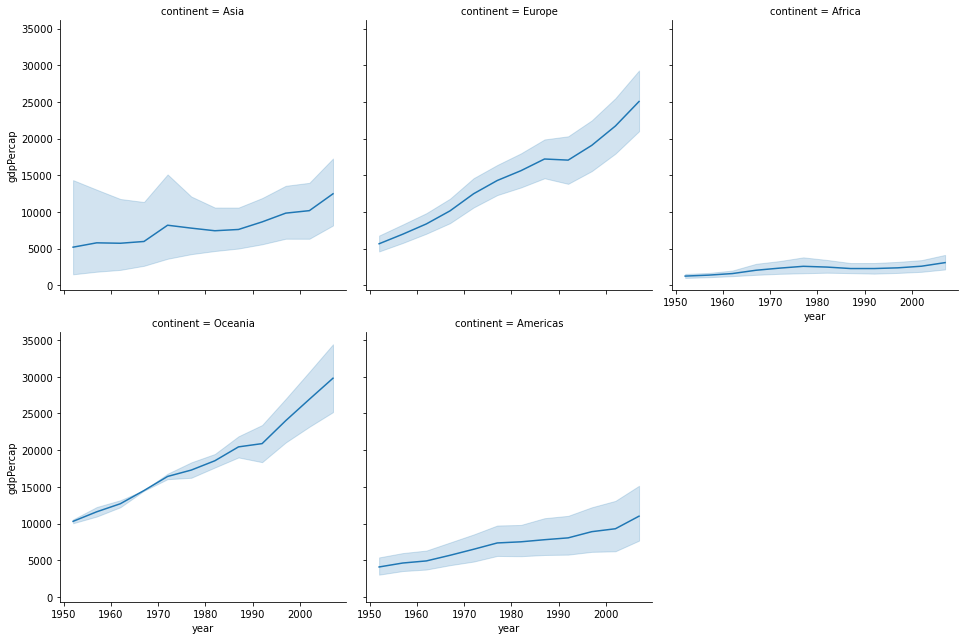

In [373]:
#change of life expectancy over time for different continents
a = sns.FacetGrid(data_all_continents,col = 'continent',col_wrap = 3,height = 4.5,aspect = 1)#height = 3,aspect = 0.8)
a.map(sns.lineplot,'year','gdpPercap')
a.add_legend()

In the above example, datasets were appended (or stacked on top of each other).

Datasets can also be concatenated side-by-side (by providing the argument *axis = 1* with the *concat()* function) as we saw with the *merge* function.

### Practice exercise 4

Read the documentations of the Pandas DataFrame methods `merge()` and `concat()`, and identify the differences. Mention examples when you can use (i) either, (ii) only `concat()`, (iii) only `merge()`

## Reshaping data

### Pivoting "long" to "wide" format

In [31]:
data_all_continents

,continent,country,year,lifeExp,pop,gdpPercap
0,Asia,Afghanistan,1952,28.801,8425333,779.445314
1,Asia,Afghanistan,1957,30.332,9240934,820.853030
2,Asia,Afghanistan,1962,31.997,10267083,853.100710
3,Asia,Afghanistan,1967,34.020,11537966,836.197138
4,Asia,Afghanistan,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Americas,Venezuela,1987,70.190,17910182,9883.584648
1700,Americas,Venezuela,1992,71.150,20265563,10733.926310
1701,Americas,Venezuela,1997,72.146,22374398,10165.495180
1702,Americas,Venezuela,2002,72.766,24287670,8605.047831


In [43]:
data_wide.columns.nlevels

2

In [49]:
data_wide=data_all_continents.pivot(index=['continent', 'country'], columns='year',values='lifeExp')
data_wide

year                        1952    1957    1962    1967    1972    1977  \
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

In [51]:
data_wide.reset_index(inplace = True)

In [52]:
data_wide

year,continent,country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,Africa,Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,Africa,Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,Africa,Benin,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,Africa,Botswana,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,Africa,Burkina Faso,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Europe,Switzerland,69.620,70.560,71.320,72.770,73.780,75.390,76.210,77.410,78.030,79.370,80.620,81.701
138,Europe,Turkey,43.585,48.079,52.098,54.336,57.005,59.507,61.036,63.108,66.146,68.835,70.845,71.777
139,Europe,United Kingdom,69.180,70.420,70.760,71.360,72.010,72.760,74.040,75.007,76.420,77.218,78.471,79.425
140,Oceania,Australia,69.120,70.330,70.930,71.100,71.930,73.490,74.740,76.320,77.560,78.830,80.370,81.235


<AxesSubplot:xlabel='1952', ylabel='2007'>

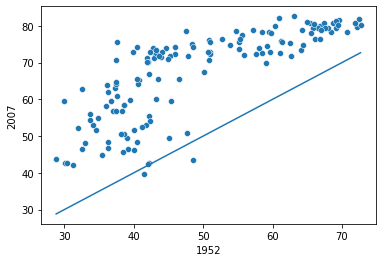

In [46]:
sns.scatterplot(x = 1952, y = 2007, data = data_wide)
sns.lineplot(x = 1952, y = 1952, data = data_wide)

In [54]:
data_wide.melt(id_vars = ['continent', 'country'])

,continent,country,year,value
0,Africa,Algeria,1952,43.077
1,Africa,Angola,1952,30.015
2,Africa,Benin,1952,38.223
3,Africa,Botswana,1952,47.622
4,Africa,Burkina Faso,1952,31.975
...,...,...,...,...
1699,Europe,Switzerland,2007,81.701
1700,Europe,Turkey,2007,71.777
1701,Europe,United Kingdom,2007,79.425
1702,Oceania,Australia,2007,81.235


In [97]:
data_wide = data_all_continents.pivot(index=['continent', 'country'],columns='year',values='gdpPercap')

In [92]:
data_wide = data_all_continents.pivot(columns='year',values='gdpPercap')

In [96]:
data_wide

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,779.445314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,820.85303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,853.10071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,836.197138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,739.981106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9883.584648,NaN,NaN,NaN,NaN
1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10733.92631,NaN,NaN,NaN
1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10165.49518,NaN,NaN
1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8605.047831,NaN


### Pivoting "wide" to "long" format

In [102]:
data_wide.reset_index(inplace=True)

In [108]:
data_wide.melt(id_vars = ['continent','country'])

,continent,country,year,value
0,Africa,Algeria,1952,2449.008185
1,Africa,Angola,1952,3520.610273
2,Africa,Benin,1952,1062.752200
3,Africa,Botswana,1952,851.241141
4,Africa,Burkina Faso,1952,543.255241
...,...,...,...,...
1699,Europe,Switzerland,2007,37506.419070
1700,Europe,Turkey,2007,8458.276384
1701,Europe,United Kingdom,2007,33203.261280
1702,Oceania,Australia,2007,34435.367440


In [109]:
data_wide = data_all_continents.pivot(index=['continent', 'country'],columns='year',values=['gdpPercap','lifeExp'])

In [113]:
data_wide.reset_index(inplace=True)

In [116]:
data_wide.head(idx)

continent       country    gdpPercap                            \
year                                 1952         1957         1962   
0       Africa       Algeria  2449.008185  3013.976023  2550.816880   
1       Africa        Angola  3520.610273  3827.940465  4269.276742   
2       Africa         Benin  1062.752200   959.601080   949.499064   
3       Africa      Botswana   851.241141   918.232535   983.653976   
4       Africa  Burkina Faso   543.255241   617.183465   722.512021   

                                                                       ...  \
year         1967         1972         1977         1982         1987  ...   
0     3246.991771  4182.663766  4910.416756  5745.160213  5681.358539  ...   
1     5522.776375  5473.288005  3008.647355  2756.953672  2430.208311  ...   
2     1035.831411  1085.796879  1029.161251  1277.897616  1225.856010  ...   
3     1214.709294  2263.611114  3214.857818  4551.142150  6205.883850  ...   
4      794.826560   854.735976   743.387037   807.198586   912.063142  ...   

     lifeExp                                                                  \
year    1962    1967    1972    1977    1982    1987    1992    1997    2002   
0     48.303  51.407  54.518  58.014  61.368  65.799  67.744  69.152  70.994   
1     34.000  35.985  37.928  39.483  39.942  39.906  40.647  40.963  41.003   
2     42.618  44.885  47.014  49.190  50.904  52.337  53.919  54.777  54.406   
3     51.520  53.298  56.024  59.319  61.484  63.622  62.745  52.556  46.634   
4     37.814  40.697  43.591  46.137  48.122  49.557  50.260  50.324  50.650   

              
year    2007  
0     72.301  
1     42.731  
2     56.728  
3     50.728  
4     52.295  

[5 rows x 26 columns]

In [121]:
d2=data_wide.melt(id_vars = ['continent','country'],var_name=['Metric','year'])

In [125]:
d2

,continent,country,Metric,year,value
0,Africa,Algeria,gdpPercap,1952,2449.008185
1,Africa,Angola,gdpPercap,1952,3520.610273
2,Africa,Benin,gdpPercap,1952,1062.752200
3,Africa,Botswana,gdpPercap,1952,851.241141
4,Africa,Burkina Faso,gdpPercap,1952,543.255241
...,...,...,...,...,...
3403,Europe,Switzerland,lifeExp,2007,81.701000
3404,Europe,Turkey,lifeExp,2007,71.777000
3405,Europe,United Kingdom,lifeExp,2007,79.425000
3406,Oceania,Australia,lifeExp,2007,81.235000


In [126]:
d2.pivot(index=['continent','country','year'], columns='Metric')

value        
Metric                         gdpPercap lifeExp
continent country     year                      
Africa    Algeria     1952   2449.008185  43.077
                      1957   3013.976023  45.685
                      1962   2550.816880  48.303
                      1967   3246.991771  51.407
                      1972   4182.663766  54.518
...                                  ...     ...
Oceania   New Zealand 1987  19007.191290  74.320
                      1992  18363.324940  76.330
                      1997  21050.413770  77.550
                      2002  23189.801350  79.110
                      2007  25185.009110  80.204

[1704 rows x 2 columns]

In [111]:
data_wide.melt()

,NaN,year,value
0,gdpPercap,1952,2449.008185
1,gdpPercap,1952,3520.610273
2,gdpPercap,1952,1062.752200
3,gdpPercap,1952,851.241141
4,gdpPercap,1952,543.255241
...,...,...,...
3403,lifeExp,2007,81.701000
3404,lifeExp,2007,71.777000
3405,lifeExp,2007,79.425000
3406,lifeExp,2007,81.235000
